In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

In [6]:
# reflect an existing database into a new model
Base.prepare(engine,reflect = True)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-23  2016-08-23            NaN
2016-08-23  2016-08-23           1.79
2016-08-23  2016-08-23           0.05
2016-08-23  2016-08-23           0.15
...                ...            ...
2017-08-22  2017-08-22           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.08
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


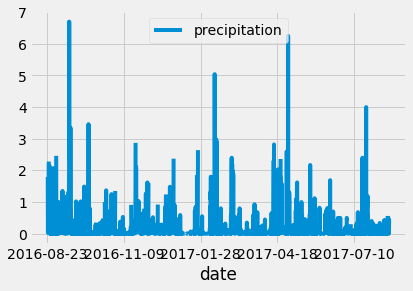

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results,columns = ['date','precipitation'])
df.set_index(df['date'],inplace = True)

# Sort the dataframe by date
df = df.sort_index()
#print(df.to_string(index = False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
print(df)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [52]:
# What are the most active stations?
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
# List the stations and the counts in descending order.
# results = session.query(Base.metadata.tables['station']).all()
# for result in results:
#     print(results)
#     print('\n')

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

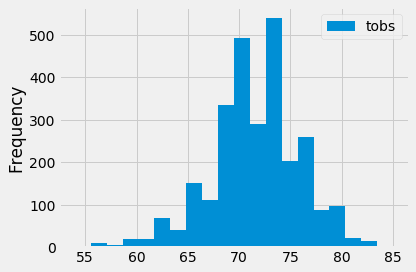

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').all()

df = pd.DataFrame(results,columns = ['tobs'])

df.plot.hist(bins=20)
plt.tight_layout()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

             prcp
count  171.000000
mean     0.120000
std      0.217726
min      0.000000
25%      0.000000
50%      0.020000
75%      0.150000
max      1.690000
             tobs
count  191.000000
mean    77.219895
std      2.622538
min     71.000000
25%     75.000000
50%     77.000000
75%     79.000000
max     83.000000


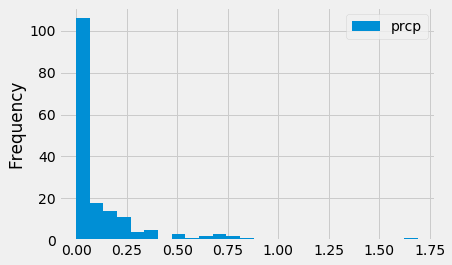

In [64]:
#Lets look at information specifically for June 
#Set the date periods for June 
# Calculate the date one year from the last date in data set.
start_dt = dt.date(2017, 6, 1)
end_dt = dt.date(2017,6,30)
# Perform a query to retrieve the data and precipitation scores
results_prcp = []
results_prcp = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= start_dt).\
    filter(Measurement.date <= end_dt).all()

df = pd.DataFrame(results_prcp,columns = ['date','prcp'])
df.plot.hist(bins = 25)
print(df.describe())


results_tobs = session.query(Measurement.tobs).\
    filter(Measurement.date >= start_dt).\
    filter(Measurement.date <= end_dt).all()

df = pd.DataFrame(results_tobs)
print(df.describe())

             prcp
count  178.000000
mean     0.199494
std      0.342967
min      0.000000
25%      0.020000
50%      0.060000
75%      0.247500
max      2.370000
             tobs
count  200.000000
mean    71.130000
std      3.419292
min     60.000000
25%     69.000000
50%     71.000000
75%     74.000000
max     78.000000


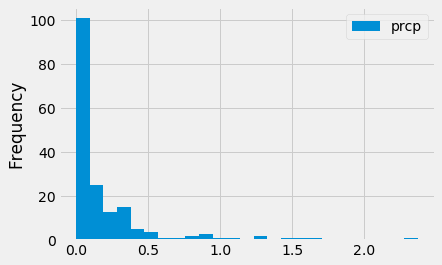

In [65]:
#Lets look at information specifically for December
#Set the date periods for December 
# Calculate the date one year from the last date in data set.
start_dt = dt.date(2016, 12, 1)
end_dt = dt.date(2016,12,31)
# Perform a query to retrieve the data and precipitation scores
results_ = []
results = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= start_dt).\
    filter(Measurement.date <= end_dt).all()

df = pd.DataFrame(results,columns = ['date','prcp'])
df.plot.hist(bins = 25)
print(df.describe())

results_tobs = session.query(Measurement.tobs).\
    filter(Measurement.date >= start_dt).\
    filter(Measurement.date <= end_dt).all()

df = pd.DataFrame(results_tobs)
print(df.describe())

# Analysis
By comparing the 2 previous cells for December 2016 and June 2017 we can see that the amount of rainfall for December is slightly higher than
    
June has higher average temp for the month than December (tobs) 77 degrees versus 71 degrees. December's lowest temperature is 60 degrees versus June's 71 degrees supporting the idea that icecream is definitely a summer treat.